# Johannes Diderik van der Waals Equation of State



$$
P = \frac{RT}{V-b} - \frac{a}{V^2}
$$

In [1]:
import math as m
import cmath as cm
import numpy as np

In [ ]:
tc = 647.15  # K
pc = 220.48e5  # Pa
R = 8.31446261815324  # :)
t = 473.15  # K

def cubicsolver(a1, a2, a3):
    q = (3*a2 - a1**2) / 9
    r = (9*a1*a2 - 27*a3 - 2*a1**3) / 54
    d = q**3 + r**2

    if d <= 0:
        theta = m.acos(r / m.sqrt(-q**3))
        z1 = 2*m.sqrt(-q)*m.cos(theta/3) - a1/3
        z2 = 2*m.sqrt(-q)*m.cos(theta/3 + 2*m.pi/3) - a1/3
        z3 = 2*m.sqrt(-q)*m.cos(theta/3 + 4*m.pi/3) - a1/3
        return z1, z2, z3
    else:
        s = (r + m.sqrt(d))**(1/3)
        t = (r - m.sqrt(d))**(1/3)
        z = s + t - a1/3
        return z, z, z

def fugacity(P, R, T, tc, pc):
    a = (27 * R**2 * tc**2) / (64 * pc)
    b = (R * tc) / (8 * pc)
    A = (a * P) / (T**2 * R**2)
    B = b * P / (T * R)
    a1 = -1 - B
    a2 = A
    a3 = -A * B

    z1, z2, z3 = cubicsolver(a1, a2, a3)

    z_l = min(z1, z2, z3)
    z_v = max(z1, z2, z3)

    f_l = P * m.exp((z_l - 1 - A / z_l - m.log(z_l - B)))
    f_v = P * m.exp((z_v - 1 - A / z_v - m.log(z_v - B)))

    return f_l, f_v

def fugacity_difference(P):
    f_l, f_v = fugacity(P, R, t, tc, pc)
    return f_v - f_l

def regulafalsi(f, x1, x2, maxitr=500, tol=1e-5):
    f1 = f(x1)
    f2 = f(x2)
    i = 0
    error = 1
    while i < maxitr and error >= tol:
        x3 = (x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1))
        if f(x1) * f(x3) > 0:
            error = abs(x3 - x2)
            x1, x2 = x2, x3
        elif f(x2) * f(x3) > 0:
            error = abs(x3 - x1)
            x1, x2 = x1, x3
        i += 1
    return x2

P_guess_low = 1e5
P_guess_high = 6e6

optimal_pressure = regulafalsi(fugacity_difference, P_guess_low, P_guess_high)
print(f"The optimal pressure where fugacity of liquid equals vapor: {optimal_pressure:.2f} Pa")


The optimal pressure where fugacity of liquid equals vapor: 5498029.76 Pa


In [2]:
tc = 647.15  # K
pc = 220.48e5  # Pa
R = 8.31446261815324  # :)
P = 1600000  # K

def cubicsolver(a1, a2, a3):
    q = (3*a2 - a1**2) / 9
    r = (9*a1*a2 - 27*a3 - 2*a1**3) / 54
    d = q**3 + r**2

    if d <= 0:
        theta = m.acos(r / m.sqrt(-q**3))
        z1 = 2*m.sqrt(-q)*m.cos(theta/3) - a1/3
        z2 = 2*m.sqrt(-q)*m.cos(theta/3 + 2*m.pi/3) - a1/3
        z3 = 2*m.sqrt(-q)*m.cos(theta/3 + 4*m.pi/3) - a1/3
        return z1, z2, z3
    else:
        s = (r + m.sqrt(d))**(1/3)
        t = (r - m.sqrt(d))**(1/3)
        z = s + t - a1/3
        return z, z, z

def fugacity(P, R, T, tc, pc):
    a = (27 * R**2 * tc**2) / (64 * pc)
    b = (R * tc) / (8 * pc)
    A = (a * P) / (T**2 * R**2)
    B = b * P / (T * R)
    a1 = -1 - B
    a2 = A
    a3 = -A * B

    z1, z2, z3 = cubicsolver(a1, a2, a3)

    z_l = min(z1, z2, z3)
    z_v = max(z1, z2, z3)

    f_l = P * m.exp((z_l - 1 - A / z_l - m.log(z_l - B)))
    f_v = P * m.exp((z_v - 1 - A / z_v - m.log(z_v - B)))

    return f_l, f_v

def fugacity_difference(P):
    f_l, f_v = fugacity(P, R, t, tc, pc)
    return f_v - f_l

def regulafalsi(f, x1, x2, maxitr=500, tol=1e-5):
    f1 = f(x1)
    f2 = f(x2)
    i = 0
    error = 1
    while i < maxitr and error >= tol:
        x3 = (x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1))
        if f(x1) * f(x3) > 0:
            error = abs(x3 - x2)
            x1, x2 = x2, x3
        elif f(x2) * f(x3) > 0:
            error = abs(x3 - x1)
            x1, x2 = x1, x3
        i += 1
    return x2

P_guess_low = 1e5
P_guess_high = 6e6

optimal_pressure = regulafalsi(fugacity_difference, P_guess_low, P_guess_high)
print(f"The optimal pressure where fugacity of liquid equals vapor: {optimal_pressure:.2f} Pa")


NameError: name 't' is not defined

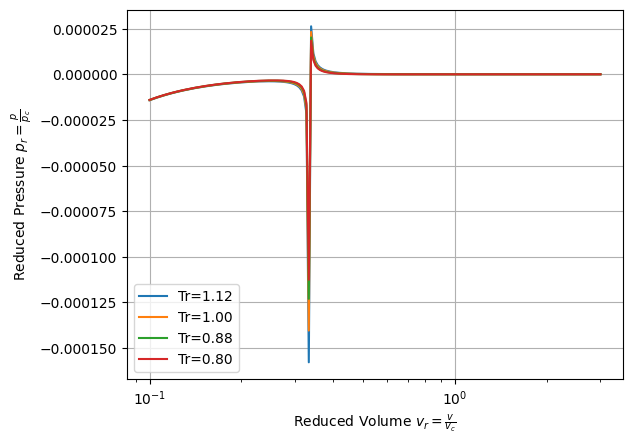

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
tc = 647.15  # K
pc = 220.48e5  # Pa
R = 8.31446261815324  # :)
t = 473.15  # K
R = 8.314  # J/(mol K), gas constant
a = (27 * R**2 * tc**2) / (64 * pc)
b = (R * tc) / (8 * pc)

# Reduced temperatures
Tr = [9/8, 1, 7/8, 4/5]

# Critical constants

Vc = (3 * b)  # L/mol, approximate critical volume

# Plotting
v = np.linspace(0.1, 3.0, 500) * Vc

plt.figure()
for T in Tr:
    T_actual = T * tc
    P = (8 * T_actual/tc) / (3*v/Vc -1) - 3 / (v/Vc)**2
    plt.plot(v / Vc, P / pc, label=f'Tr={T:.2f}')

plt.xlabel(r'Reduced Volume $v_r = \frac{v}{v_c}$')
plt.ylabel(r'Reduced Pressure $p_r = \frac{p}{p_c}$')
plt.xscale('log')
plt.yscale('linear')
plt.legend()
plt.grid(True)
plt.show()
